In [1]:
# import packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
# allow more collumns and rows to be seen
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn import linear_model
from sklearn.feature_selection import RFECV
from sklearn import metrics
import scipy.stats as stats
from scipy import stats

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [4]:
df['class'] = df['class'].replace({'p':'poisonous', 'e':'edible'})

In [5]:
df['cap-shape'] = df['cap-shape'].replace({'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken'})

In [6]:
df['cap-surface'] = df['cap-surface'].replace({'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'})

In [7]:
df['cap-color'] = df['cap-color'].replace({'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 
                         'e':'red', 'w':'white', 'y':'yellow'})

In [8]:
df['bruises'].replace({'t':'bruises', 'f':'no'})

0       bruises
1       bruises
2       bruises
3       bruises
4            no
         ...   
8119         no
8120         no
8121         no
8122         no
8123         no
Name: bruises, Length: 8124, dtype: object

In [9]:
df['odor'].replace({'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none', 'p':'pungent',
                    's':'spicy'})

0       pungent
1        almond
2         anise
3       pungent
4          none
         ...   
8119       none
8120       none
8121       none
8122      fishy
8123       none
Name: odor, Length: 8124, dtype: object

In [10]:
df['gill-attachment'].repalce({attached= a, descending= d, free= f, notched= n})

SyntaxError: invalid syntax (<ipython-input-10-1e528076570a>, line 1)

In [ ]:
df['gill-spacing'].replace({close= c, crowded= w, distant= d})

In [ ]:
df['gill-size'].replace({broad= b, narrow= n})

In [11]:
df['gill-color'].replace({black= k, brown= n, buff= b, chocolate= h, gray= g, green= r, orange= o, pink= p, purple= u, red= e, white= w, yellow= y})

SyntaxError: invalid syntax (<ipython-input-11-fff291eb6be0>, line 1)

In [12]:
df['stalk-shape'].repalce({enlarging= e, tapering= t})

SyntaxError: invalid syntax (<ipython-input-12-8c43c34f1662>, line 1)

# Dataset Key


: 

: 

: 

: 

: 

: 

: 

stalk-root: bulbous= b, club= c, cup= u, equal= e, rhizomorphs= z, rooted= r, missing= ?

stalk-surface-above-ring: fibrous= f, scaly= y, silky= k, smooth= s

stalk-surface-below-ring: fibrous= f, scaly= y, silky= k, smooth= s

stalk-color-above-ring: brown= n, buff= b, cinnamon= c, gray= g, orange= o, pink= p, red= e, white= w, yellow= y

stalk-color-below-ring: brown= n, buff= b, cinnamon= c, gray= g, orange= o, pink= p, red= e, white= w, yellow= y

veil-type: partial= p, universal= u

veil-color: brown= n, orange= o,white= w, yellow= y

ring-number: none= n, one= o, two= t

ring-type: cobwebby= c, evanescent= e, flaring= f, large= l, none= n, pendant= p, sheathing= s, zone= z

spore-print-color: black= k, brown= n, buff= b, chocolate= h, green= r, orange= o, purple= u, white= w, yellow= y

population: abundant= a, clustered= c, numerous= n, scattered= s, several= v, solitary= y

habitat: grasses= g, leaves= l, meadows= m, paths= p, urban= u, waste= w, woods= d

# Dataset Key
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell= b, conical= c, convex= x, flat= f, knobbed= k, sunken= s

cap-surface: fibrous= f, grooves= g, scaly= y, smooth= s

cap-color: brown= n, buff= b, cinnamon= c, gray= g, green= r, pink= p, purple= u, red= e, white= w, yellow= y

bruises: bruises= t, no= f

odor: almond= a, anise= l, creosote= c, fishy= y, foul= f, musty= m, none= n, pungent= p, spicy= s

gill-attachment: attached= a, descending= d, free= f, notched= n

gill-spacing: close= c, crowded= w, distant= d

gill-size: broad= b, narrow= n

gill-color: black= k, brown= n, buff= b, chocolate= h, gray= g, green= r, orange= o, pink= p, purple= u, red= e, white= w, yellow= y

stalk-shape: enlarging= e, tapering= t

stalk-root: bulbous= b, club= c, cup= u, equal= e, rhizomorphs= z, rooted= r, missing= ?

stalk-surface-above-ring: fibrous= f, scaly= y, silky= k, smooth= s

stalk-surface-below-ring: fibrous= f, scaly= y, silky= k, smooth= s

stalk-color-above-ring: brown= n, buff= b, cinnamon= c, gray= g, orange= o, pink= p, red= e, white= w, yellow= y

stalk-color-below-ring: brown= n, buff= b, cinnamon= c, gray= g, orange= o, pink= p, red= e, white= w, yellow= y

veil-type: partial= p, universal= u

veil-color: brown= n, orange= o,white= w, yellow= y

ring-number: none= n, one= o, two= t

ring-type: cobwebby= c, evanescent= e, flaring= f, large= l, none= n, pendant= p, sheathing= s, zone= z

spore-print-color: black= k, brown= n, buff= b, chocolate= h, green= r, orange= o, purple= u, white= w, yellow= y

population: abundant= a, clustered= c, numerous= n, scattered= s, several= v, solitary= y

habitat: grasses= g, leaves= l, meadows= m, paths= p, urban= u, waste= w, woods= d

In [2]:
df = pd.read_csv('decoded_mushrooms.csv')

In [3]:
df

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,missing,smooth,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,missing,smooth,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,missing,smooth,silky,white,white,partial,white,one,evanescent,white,several,leaves


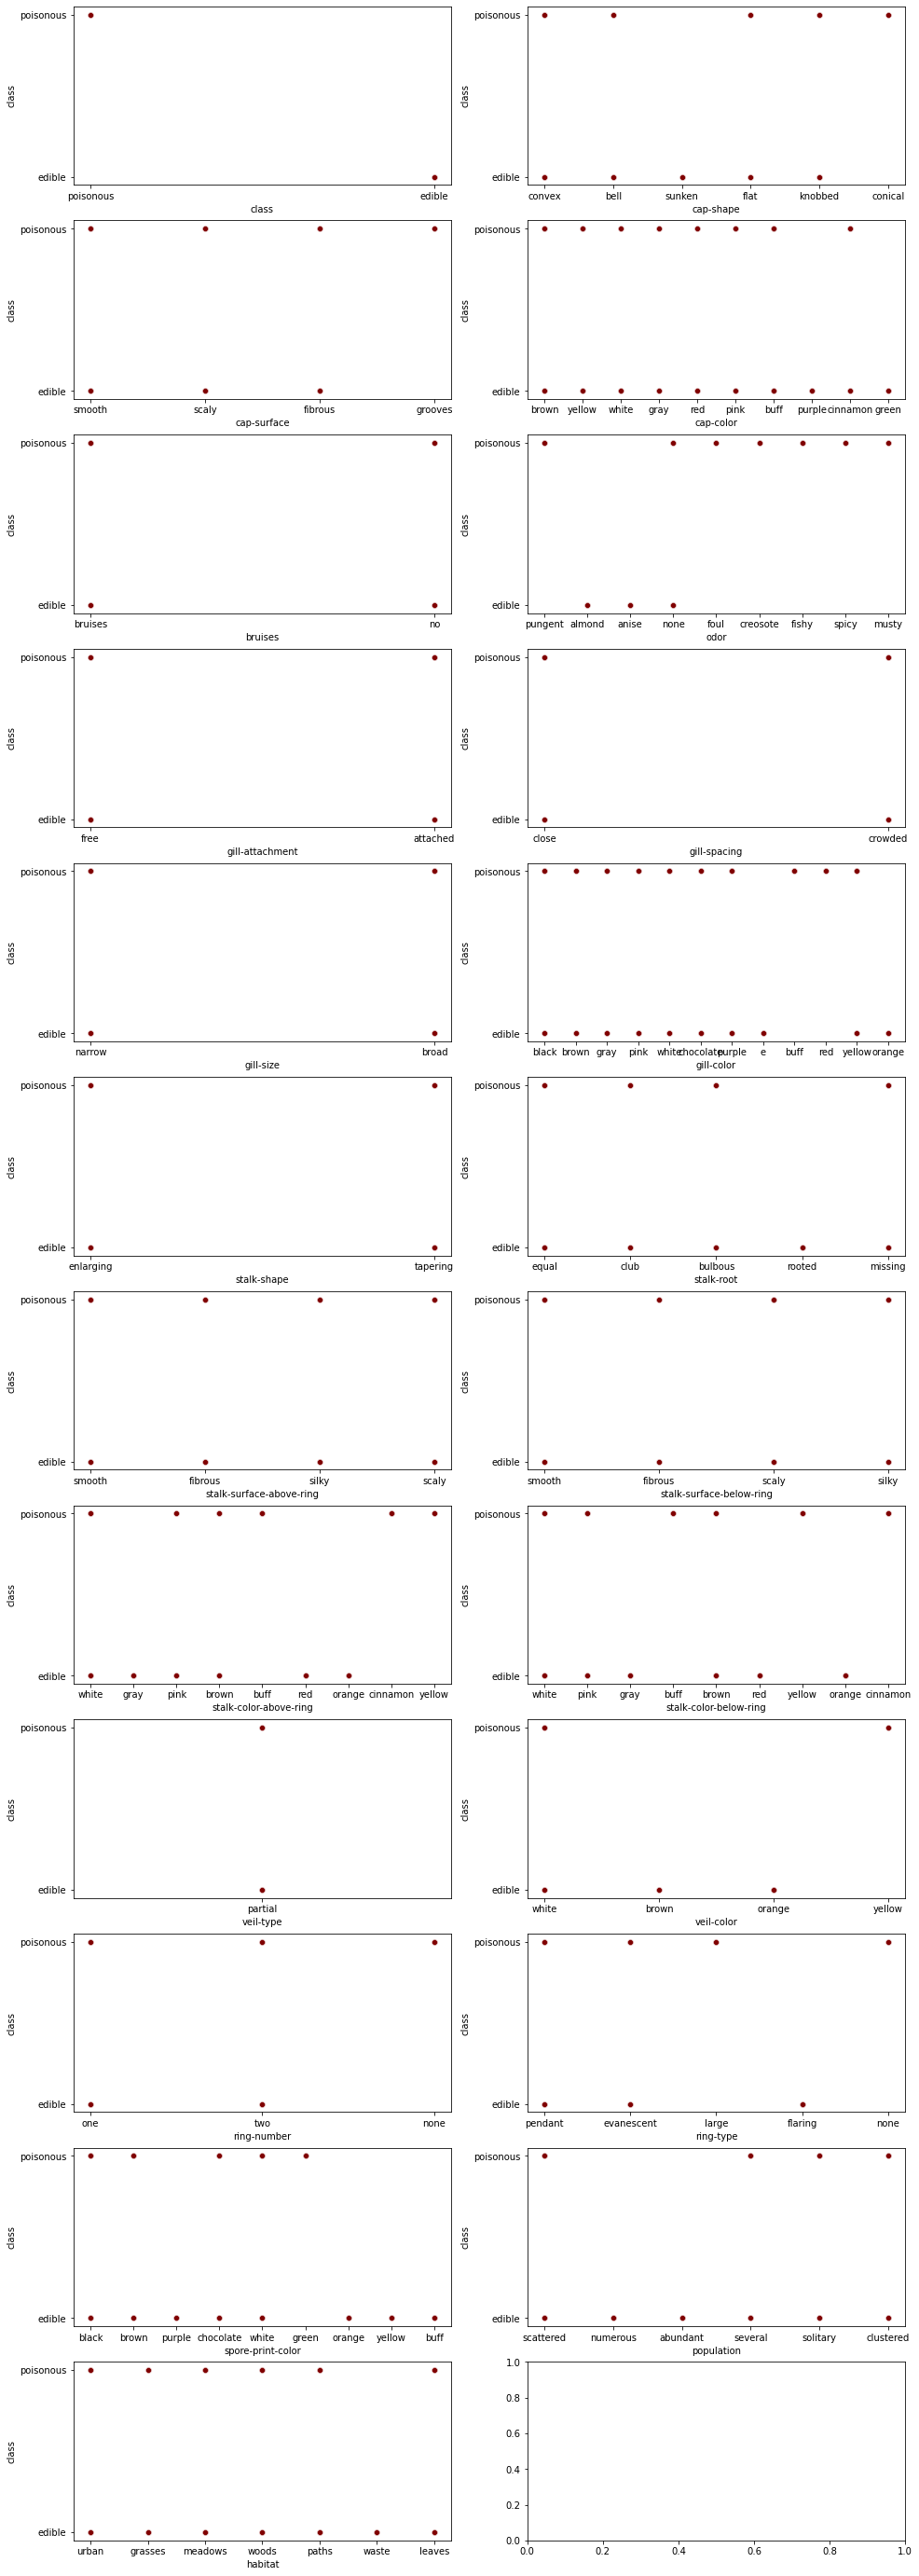

In [6]:
fig, axes = plt.subplots (nrows=12, ncols=2, figsize=(16,50))

for i, column in enumerate(df):
    sns.scatterplot(data=df, x=column, y='class', ax=axes[i//2, i%2], color = 'maroon')

In [7]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LinearRegression, LogisticRegression

# logreg = LogisticRegression(random_state=42)
# feature_cols = ['cap-shape']
# X = df[feature_cols]
# y = df['class']
# logreg.fit(X, y)
# df['df_pred'] = logreg.predict(X)

# Converting strings to ints

In [8]:
df['cap-shape'].unique()

array(['convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'],
      dtype=object)

In [9]:
df['cap-shape'] = df['cap-shape'].map({'convex':1, 'bell':2, 'sunken':3, 'flat':4, 'knobbed':5, 'conical':6})

In [10]:
# logreg = LogisticRegression(random_state=42)
# feature_cols = ['cap-shape']
# X = df[feature_cols]
# y = df['class']
# logreg.fit(X, y)
# df['pred'] = logreg.predict(X)

In [11]:
# fig, ax = plt.subplots()
# ax.scatter(df['class'], df['cap-shape'])
# ax.plot(df['class'], df['pred'], color='red')
# ax.set_xlabel('class')
# ax.set_ylabel('cap-shape');

In [12]:
#-----Use this when in number format -------
# plt.figure(figsize=(20, 10))
# plt.boxplot([df[col] for col in df.columns])
# plt.title("Box plot of all columns in dataset")
# # plt.xticks(range(len(df.columns.values)), df.columns.values)
# plt.show()

In [13]:
df['cap-surface'].unique()

array(['smooth', 'scaly', 'fibrous', 'grooves'], dtype=object)

In [14]:
df['cap-surface'] = df['cap-surface'].map({'smooth':1, 'scaly':2, 'fibrous':3, 'grooves':4})

In [15]:
df['cap-surface']

0       1
1       1
2       1
3       2
4       1
       ..
8119    1
8120    1
8121    1
8122    2
8123    1
Name: cap-surface, Length: 8124, dtype: int64

In [16]:
df['cap-color'].unique()

array(['brown', 'yellow', 'white', 'gray', 'red', 'pink', 'buff',
       'purple', 'cinnamon', 'green'], dtype=object)

In [17]:
df['cap-color'] = df['cap-color'].map({'brown':1, 'yellow':2, 'white':3, 'gray':4, 'red':5, 'pink':6, 'buff':7, 
                                       'purple':8, 'cinnamon':9, 'green': 10})

In [18]:
df['cap-color']

0       1
1       2
2       3
3       3
4       4
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: cap-color, Length: 8124, dtype: int64

In [19]:
df['bruises'].unique()

array(['bruises', 'no'], dtype=object)

In [20]:
df['bruises'] = df['bruises'].map({'bruises':1, 'no':2})

In [21]:
df['bruises']

0       1
1       1
2       1
3       1
4       2
       ..
8119    2
8120    2
8121    2
8122    2
8123    2
Name: bruises, Length: 8124, dtype: int64

In [22]:
df['odor'].unique()

array(['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy',
       'spicy', 'musty'], dtype=object)

In [23]:
df['odor'] = df['odor'].map({'pungent':1, 'almond':2, 'anise':3, 'none':4, 'foul':5, 'creosote':6, 'fishy':7, 
                                       'spicy':8, 'musty': 9})

In [24]:
df['odor']

0       1
1       2
2       3
3       1
4       4
       ..
8119    4
8120    4
8121    4
8122    7
8123    4
Name: odor, Length: 8124, dtype: int64

In [25]:
df['gill-attachment'].unique()

array(['free', 'attached'], dtype=object)

In [26]:
df['gill-attachment'] = df['gill-attachment'].map({'free':1, 'attached':2})

In [27]:
df['gill-attachment']

0       1
1       1
2       1
3       1
4       1
       ..
8119    2
8120    2
8121    2
8122    1
8123    2
Name: gill-attachment, Length: 8124, dtype: int64

In [28]:
df['gill-spacing'].unique()

array(['close', 'crowded'], dtype=object)

In [29]:
df['gill-spacing'] = df['gill-spacing'].map({'close':1, 'crowded':2})

In [30]:
df['gill-spacing']

0       1
1       1
2       1
3       1
4       2
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: gill-spacing, Length: 8124, dtype: int64

In [31]:
df['gill-size'].unique()

array(['narrow', 'broad'], dtype=object)

In [32]:
df['gill-size'] = df['gill-size'].map({'narrow':1, 'broad':2})

In [33]:
df['gill-size']

0       1
1       2
2       2
3       1
4       2
       ..
8119    2
8120    2
8121    2
8122    1
8123    2
Name: gill-size, Length: 8124, dtype: int64

In [34]:
df['gill-color'].unique()

array(['black', 'brown', 'gray', 'pink', 'white', 'chocolate', 'purple',
       'e', 'buff', 'red', 'yellow', 'orange'], dtype=object)

In [35]:
df['gill-color'] = df['gill-color'].map({'black':1, 'brown':2, 'gray':3, 'pink':4, 'white':5, 'chocolate':6, 'purple':7, 
                                       'e':8, 'buff': 9, 'red':10, 'yellow':11, 'orange':12})

In [36]:
df['gill-color']

0        1
1        1
2        2
3        2
4        1
        ..
8119    11
8120    11
8121     2
8122     9
8123    11
Name: gill-color, Length: 8124, dtype: int64

In [37]:
df['stalk-shape'].unique()

array(['enlarging', 'tapering'], dtype=object)

In [38]:
df['stalk-shape'] = df['stalk-shape'].map({'enlarging':1, 'tapering':2})

In [39]:
df['stalk-shape']

0       1
1       1
2       1
3       1
4       2
       ..
8119    1
8120    1
8121    1
8122    2
8123    1
Name: stalk-shape, Length: 8124, dtype: int64

In [40]:
df['stalk-root'].unique()

array(['equal', 'club', 'bulbous', 'rooted', 'missing'], dtype=object)

In [41]:
df['stalk-root'] = df['stalk-root'].map({'equal':1, 'club':2, 'bulbous':3, 'rooted':4, 'missing':5})

In [42]:
df['stalk-root']

0       1
1       2
2       2
3       1
4       1
       ..
8119    5
8120    5
8121    5
8122    5
8123    5
Name: stalk-root, Length: 8124, dtype: int64

In [43]:
df['stalk-surface-above-ring'].unique()

array(['smooth', 'fibrous', 'silky', 'scaly'], dtype=object)

In [44]:
df['stalk-surface-above-ring'] = df['stalk-surface-above-ring'].map({'smooth':1, 'fibrous':2, 'silky':3, 'scaly':4})

In [45]:
df['stalk-surface-above-ring']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: stalk-surface-above-ring, Length: 8124, dtype: int64

In [46]:
df['stalk-surface-below-ring'].unique()

array(['smooth', 'fibrous', 'scaly', 'silky'], dtype=object)

In [47]:
df['stalk-surface-below-ring'] = df['stalk-surface-below-ring'].map({'smooth':1, 'fibrous':2, 'scaly':3, 'silky':4})

In [48]:
df['stalk-surface-below-ring']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    4
8123    1
Name: stalk-surface-below-ring, Length: 8124, dtype: int64

In [49]:
df['stalk-color-above-ring'].unique()

array(['white', 'gray', 'pink', 'brown', 'buff', 'red', 'orange',
       'cinnamon', 'yellow'], dtype=object)

In [50]:
df['stalk-color-above-ring'] = df['stalk-color-above-ring'].map({'white':1, 'gray':2, 'pink':3, 'brown':4, 'buff':5, 'red':6,
                                                                 'orange':7, 'cinnamon':8, 'yellow': 9})

In [51]:
df['stalk-color-above-ring']

0       1
1       1
2       1
3       1
4       1
       ..
8119    7
8120    7
8121    7
8122    1
8123    7
Name: stalk-color-above-ring, Length: 8124, dtype: int64

In [52]:
df['stalk-color-below-ring'].unique()

array(['white', 'pink', 'gray', 'buff', 'brown', 'red', 'yellow',
       'orange', 'cinnamon'], dtype=object)

In [53]:
df['stalk-color-below-ring'] = df['stalk-color-below-ring'].map({'white':1, 'pink':2, 'gray':3, 'buff':4, 'brown':5,
                                                                    'red':6, 'yellow':7, 'orange':8, 'cinnamon': 9})

In [54]:
df['stalk-color-below-ring']

0       1
1       1
2       1
3       1
4       1
       ..
8119    8
8120    8
8121    8
8122    1
8123    8
Name: stalk-color-below-ring, Length: 8124, dtype: int64

In [55]:
df['veil-type'].unique()

array(['partial'], dtype=object)

In [56]:
df['veil-type'] = df['veil-type'].map({'partial':1})

In [57]:
df['veil-type']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: veil-type, Length: 8124, dtype: int64

In [58]:
df['veil-color'].unique()

array(['white', 'brown', 'orange', 'yellow'], dtype=object)

In [59]:
df['veil-color'] = df['veil-color'].map({'white':1, 'brown':2, 'orange':3, 'yellow':4})

In [60]:
df['veil-color']

0       1
1       1
2       1
3       1
4       1
       ..
8119    3
8120    2
8121    3
8122    1
8123    3
Name: veil-color, Length: 8124, dtype: int64

In [61]:
df['ring-number'].unique()

array(['one', 'two', 'none'], dtype=object)

In [62]:
df['ring-number'] = df['ring-number'].map({'one':1, 'two':2, 'none':3})

In [63]:
df['ring-number']

0       1
1       1
2       1
3       1
4       1
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: ring-number, Length: 8124, dtype: int64

In [64]:
df['ring-type'].unique()

array(['pendant', 'evanescent', 'large', 'flaring', 'none'], dtype=object)

In [65]:
df['ring-type'] = df['ring-type'].map({'pendant':1, 'evanescent':2, 'large':3, 'flaring':4, 'none':5})

In [66]:
df['ring-type']

0       1
1       1
2       1
3       1
4       2
       ..
8119    1
8120    1
8121    1
8122    2
8123    1
Name: ring-type, Length: 8124, dtype: int64

In [67]:
df['spore-print-color'].unique()

array(['black', 'brown', 'purple', 'chocolate', 'white', 'green',
       'orange', 'yellow', 'buff'], dtype=object)

In [68]:
df['spore-print-color'] = df['spore-print-color'].map({'black':1, 'brown':2, 'purple':3, 'chocolate':4, 'white':5, 'green':6, 
                                                       'orange':7, 'yellow':8, 'buff': 9})

In [69]:
df['spore-print-color']

0       1
1       2
2       2
3       1
4       2
       ..
8119    9
8120    9
8121    9
8122    5
8123    7
Name: spore-print-color, Length: 8124, dtype: int64

In [70]:
df['population'].unique()

array(['scattered', 'numerous', 'abundant', 'several', 'solitary',
       'clustered'], dtype=object)

In [71]:
df['population'] = df['population'].map({'scattered':1, 'numerous':2, 'abundant':3, 'several':4, 'solitary':5, 'clustered':6})

In [72]:
df['population']

0       1
1       2
2       2
3       1
4       3
       ..
8119    6
8120    4
8121    6
8122    4
8123    6
Name: population, Length: 8124, dtype: int64

In [73]:
df['habitat'].unique()

array(['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'],
      dtype=object)

In [74]:
df['habitat'] = df['habitat'].map({'urban':1, 'grasses':2, 'meadows':3, 'woods':4, 'paths':5, 'waste':6, 'leaves':7})

In [75]:
df['habitat']

0       1
1       2
2       3
3       1
4       2
       ..
8119    7
8120    7
8121    7
8122    7
8123    7
Name: habitat, Length: 8124, dtype: int64

In [76]:
df['class'].unique()

array(['poisonous', 'edible'], dtype=object)

In [77]:
df['class'] = df['class'].map({'poisonous':1, 'edible':2})

In [78]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [79]:
for col in df.columns:
    print(df[col])

0       1
1       2
2       2
3       1
4       2
       ..
8119    2
8120    2
8121    2
8122    1
8123    2
Name: class, Length: 8124, dtype: int64
0       1
1       1
2       2
3       1
4       1
       ..
8119    5
8120    1
8121    4
8122    5
8123    1
Name: cap-shape, Length: 8124, dtype: int64
0       1
1       1
2       1
3       2
4       1
       ..
8119    1
8120    1
8121    1
8122    2
8123    1
Name: cap-surface, Length: 8124, dtype: int64
0       1
1       2
2       3
3       3
4       4
       ..
8119    1
8120    1
8121    1
8122    1
8123    1
Name: cap-color, Length: 8124, dtype: int64
0       1
1       1
2       1
3       1
4       2
       ..
8119    2
8120    2
8121    2
8122    2
8123    2
Name: bruises, Length: 8124, dtype: int64
0       1
1       2
2       3
3       1
4       4
       ..
8119    4
8120    4
8121    4
8122    7
8123    4
Name: odor, Length: 8124, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
8119    2
8120    2
8121 

In [80]:
df['class'].value_counts()

2    4208
1    3916
Name: class, dtype: int64

In [81]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [82]:
logreg = LogisticRegression(random_state=22)
feature_cols = ['habitat']
X = df[feature_cols]
y = df['class']
logreg.fit(X, y)
df['pred'] = logreg.predict(X)

In [83]:
# df['habitat_pred_class'] = np.where(df['habitat_pred'] >= 1.5, 1, 2)
# df.head()

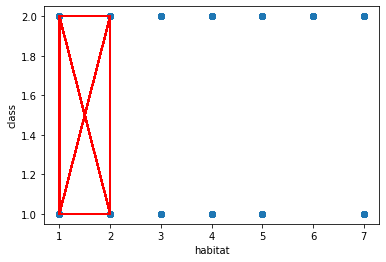

In [84]:
fig, ax = plt.subplots()
ax.scatter(df['habitat'], df['class'])
ax.plot(df['class'], df['pred'], color='red')
ax.set_xlabel('habitat')
ax.set_ylabel('class');

# Train Test Split

In [82]:
target = df['class']
# df = df.drop('class', axis = 1)

In [83]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [84]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [84]:
# relevant_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor']
#        'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
#        'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
#        'stalk-surface-below-ring', 'stalk-color-above-ring',
#        'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
#        'ring-type', 'spore-print-color', 'population', 'habitat']
# dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first = True)

In [85]:
relevant_columns = ['stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',]
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first = True)

In [86]:
dummy_dataframe = dummy_dataframe.dropna()

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [88]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, random_state = 21)

In [89]:
logreg = LogisticRegression()

In [90]:
logreg.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
y_train = logreg.predict(X_train)
y_test = logreg.predict(X_test)

In [92]:
print(y_train)
print(y_test)

[2 1 2 ... 1 1 1]
[2 2 1 ... 2 2 2]


In [ ]:
#SekectKBest to cut down columns and use the best columns for the next model
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

In [ ]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

In [ ]:
selected_columns
removed_columns

In [ ]:
df[selected_columns]

In [81]:
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

In [82]:
# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [83]:
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [180]:
# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [181]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(None))
    print("F1-Score: {}".format(None))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics


NameError: name 'adaboost_train_preds' is not defined

In [182]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

NameError: name 'adaboost_test_preds' is not defined

In [183]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

NameError: name 'gbt_clf_test_preds' is not defined

In [184]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

NameError: name 'adaboost_test_preds' is not defined

In [185]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

NameError: name 'gbt_clf_test_preds' is not defined